## STORMDATA

In [1]:
import pandas as pd

path = '/Users/iamqb/Desktop/NIW/Business Resilience to Natural Disasters Using ML/Data/'

df2014 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2014_c20250520.csv')
df2015 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2015_c20250818.csv')
df2016 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2016_c20250818.csv')
df2017 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2017_c20250520.csv')
df2018 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2018_c20250520.csv')
df2019 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2019_c20250520.csv')
df2020 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2020_c20250702.csv')
df2021 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2021_c20250520.csv')
df2022 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2022_c20250721.csv')
df2023 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2023_c20250731.csv')
df2024 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2024_c20250818.csv')
df2025 = pd.read_csv(path+'StormEvents_details-ftp_v1.0_d2025_c20250818.csv')

df_all = pd.concat([df2014, df2015, df2016, df2017, df2018, df2019, df2020,
                      df2021, df2022, df2023, df2024, df2025], ignore_index=True)

In [2]:
df_all.head(10)
#print(df_all.info())

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201402,18,1000,201402,18,2000,83473,503953,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure developing south of Long Island a...,Eight to twelve inches of snow fell across eas...,CSV
1,201402,5,300,201402,5,2300,83491,504065,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure moving off the mid-Atlantic coast...,Six to twelve inches of snow fell across easte...,CSV
2,201401,18,1000,201401,19,700,82185,494521,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure brought a brief period of heavy s...,Four to eight inches of snow fell across easte...,CSV
3,201411,26,1000,201411,27,1000,91728,549746,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong coastal storm moved up the east coast...,Six to eight inches of snow fell across easter...,CSV
4,201402,13,630,201402,14,800,83476,503982,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A significant winter storm brought six to twel...,Five to eight inches of snow fell across easte...,CSV
5,201404,24,1014,201404,24,1316,84793,512089,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong cold air advection behind a mid level l...,The Automated Surface Observation System at Ma...,CSV
6,201401,2,500,201401,3,1000,82256,495626,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A significant, rapidly developing coastal stor...",Six to nine inches of snow fell across eastern...,CSV
7,201404,15,1255,201404,15,1255,84795,512096,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong low level jet coupled with the advanc...,The Automated Surface Observation System at Ma...,CSV
8,201403,26,1342,201403,26,1342,83996,507059,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A large ocean storm intensified very quickly o...,A tree and wires were downed on Chestnut Stree...,CSV
9,201411,2,1140,201411,2,1310,91722,549721,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An intensifying coastal low pressure system mo...,A tree and wires were downed on Dublin Avenue ...,CSV


In [4]:
# Function to convert strings like '0.00K', '8.34M' to int64
def convert_to_number(value):
    value = str(value).strip()
    try:
        if value.endswith('K'):
            return int(float(value[:-1]) * 1000)
        elif value.endswith('M'):
            return int(float(value[:-1]) * 1000000)
        else:
            return int(float(value))
    except (ValueError, TypeError):
        return 0  # Replace invalid values with 0 for int64 compatibility

# Convert DAMAGE_PROPERTY and DAMAGE_CROPS to int64
df_all.loc[:, 'DAMAGE_PROPERTY'] = df_all['DAMAGE_PROPERTY'].apply(convert_to_number).astype('int64')
df_all.loc[:, 'DAMAGE_CROPS'] = df_all['DAMAGE_CROPS'].apply(convert_to_number).astype('int64')

# Create df_flood with deep copy after filtering
df_flood = df_all[df_all['EVENT_TYPE'].isin(['Flood', 'Hurricane', 'Flash Flood', 'Heavy Rain'])].copy(deep=True)

# Derive MONTH and QUARTER using .loc
df_flood.loc[:, 'MONTH'] = df_flood['BEGIN_YEARMONTH'].astype(str).str[4:6].astype(int)
df_flood.loc[:, 'QUARTER'] = ((df_flood['MONTH'] - 1) // 3 + 1).astype(int)  # Already int, kept for consistency

# Compute INJURIES, DEATHS, and DAMAGE using .loc
df_flood.loc[:, 'INJURIES'] = (df_flood['INJURIES_DIRECT'].astype(int) +
                               df_flood['INJURIES_INDIRECT'].astype(int)).astype('int64')
df_flood.loc[:, 'DEATHS'] = (df_flood['DEATHS_DIRECT'].astype(int) +
                             df_flood['DEATHS_INDIRECT'].astype(int)).astype('int64')
df_flood.loc[:, 'DAMAGE'] = (df_flood['DAMAGE_PROPERTY'] +
                             df_flood['DAMAGE_CROPS']).astype('int64')

# Remove rows where INJURIES, DEATHS, and DAMAGE are all zero
df_flood_n = df_flood[~((df_flood['DAMAGE'] == 0) & (df_flood['DEATHS'] == 0) & (df_flood['INJURIES'] == 0))]


In [54]:
import pandas as pd

def calculate_percentile_df(df, group_cols, percentile, suffix, output_name):
    """
    Calculate percentile-based filtering and aggregation for a given dataframe.
    
    Parameters:
    - df: Input dataframe (e.g., df_flood or df_flood_n)
    - group_cols: List of columns to group by for percentile calculation (e.g., ['STATE'], ['STATE', 'CZ_NAME'])
    - percentile: Percentile value (e.g., 0.9 or 0.95)
    - suffix: Suffix for output dataframe name and temporary column (e.g., '_90', '_95_y')
    - output_name: Name of the output dataframe (e.g., 'df_flood_90')
    
    Returns:
    - Filtered and aggregated dataframe
    """
    # Calculate percentile
    percentile_col = f'percentile{suffix}'
    percentile_df = df.groupby(group_cols)['DAMAGE'].quantile(percentile).reset_index(name=percentile_col)
    
    # Merge and filter
    result_df = df.merge(percentile_df, on=group_cols, how='left')
    result_df = result_df[result_df['DAMAGE'] >= result_df[percentile_col]]
    
    # Drop percentile column
    result_df = result_df.drop(columns=[percentile_col])
    
    # Aggregate
    agg_cols = {
        'INJURIES': 'sum',
        'INJURIES_DIRECT': 'sum',
        'INJURIES_INDIRECT': 'sum',
        'DEATHS': 'sum',
        'DEATHS_DIRECT': 'sum',
        'DEATHS_INDIRECT': 'sum',
        'DAMAGE': 'sum',
        'DAMAGE_PROPERTY': 'sum',
        'DAMAGE_CROPS': 'sum'
    }
    result_df = result_df.groupby(['STATE', 'CZ_NAME', 'YEAR', 'QUARTER', 'MONTH']).agg(agg_cols).reset_index()
    
    return result_df

# Define aggregation parameters
agg_params = [
    # For df_flood (with zero damages)
    {'df': df_flood, 'group_cols': ['STATE'], 'percentile': 0.9, 'suffix': '_90', 'output_name': 'df_flood_90'},
    {'df': df_flood, 'group_cols': ['STATE'], 'percentile': 0.95, 'suffix': '_95', 'output_name': 'df_flood_95'},
    {'df': df_flood, 'group_cols': ['YEAR', 'STATE'], 'percentile': 0.9, 'suffix': '_90_y', 'output_name': 'df_flood_90_y'},
    {'df': df_flood, 'group_cols': ['YEAR', 'STATE'], 'percentile': 0.95, 'suffix': '_95_y', 'output_name': 'df_flood_95_y'},
    {'df': df_flood, 'group_cols': ['STATE', 'CZ_NAME'], 'percentile': 0.9, 'suffix': '_90', 'output_name': 'df_floodc_90'},
    {'df': df_flood, 'group_cols': ['STATE', 'CZ_NAME'], 'percentile': 0.95, 'suffix': '_95', 'output_name': 'df_floodc_95'},
    {'df': df_flood, 'group_cols': ['YEAR', 'STATE', 'CZ_NAME'], 'percentile': 0.9, 'suffix': '_90_y', 'output_name': 'df_floodc_90_y'},
    {'df': df_flood, 'group_cols': ['YEAR', 'STATE', 'CZ_NAME'], 'percentile': 0.95, 'suffix': '_95_y', 'output_name': 'df_floodc_95_y'},
    # For df_flood_n (without zero damages)
    {'df': df_flood_n, 'group_cols': ['STATE'], 'percentile': 0.9, 'suffix': '_90', 'output_name': 'df_flood_n_90'},
    {'df': df_flood_n, 'group_cols': ['STATE'], 'percentile': 0.95, 'suffix': '_95', 'output_name': 'df_flood_n_95'},
    {'df': df_flood_n, 'group_cols': ['YEAR', 'STATE'], 'percentile': 0.9, 'suffix': '_90_y', 'output_name': 'df_flood_n_90_y'},
    {'df': df_flood_n, 'group_cols': ['YEAR', 'STATE'], 'percentile': 0.95, 'suffix': '_95_y', 'output_name': 'df_flood_n_95_y'},
    {'df': df_flood_n, 'group_cols': ['STATE', 'CZ_NAME'], 'percentile': 0.9, 'suffix': '_90', 'output_name': 'df_floodc_n_90'},
    {'df': df_flood_n, 'group_cols': ['STATE', 'CZ_NAME'], 'percentile': 0.95, 'suffix': '_95', 'output_name': 'df_floodc_n_95'},
    {'df': df_flood_n, 'group_cols': ['YEAR', 'STATE', 'CZ_NAME'], 'percentile': 0.9, 'suffix': '_90_y', 'output_name': 'df_floodc_n_90_y'},
    {'df': df_flood_n, 'group_cols': ['YEAR', 'STATE', 'CZ_NAME'], 'percentile': 0.95, 'suffix': '_95_y', 'output_name': 'df_floodc_n_95_y'},
]

# Execute aggregations and store results
results = {}
for params in agg_params:
    results[params['output_name']] = calculate_percentile_df(
        df=params['df'],
        group_cols=params['group_cols'],
        percentile=params['percentile'],
        suffix=params['suffix'],
        output_name=params['output_name']
    )

# Access results as needed, e.g., results['df_flood_90'], results['df_floodc_n_95_y']

## PLOT - PLEASE SELECT your STATE, YEAR, VALUE or DATABASE

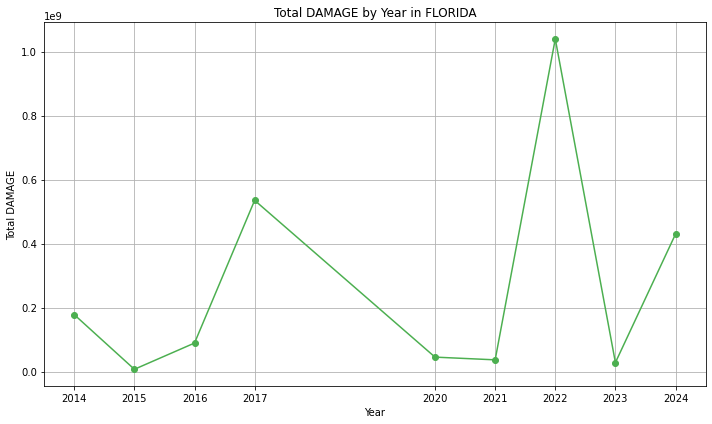

In [55]:
import matplotlib.pyplot as plt

state = 'FLORIDA'  # Specify your state
value = 'DAMAGE'      # Specify your value (e.g., 'DEATHS', 'INJURIES', etc.)
df_name = 'df_flood_n_90'

# Filter for the specified state
df = globals()[df_name]
df_state = df[df['STATE'] == state]
#df_state = df_flood_90[df_flood_90['STATE'] == state]

# Group by YEAR and sum the chosen value
df_grouped = df_state.groupby('YEAR')[value].sum().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['YEAR'], df_grouped[value], marker='o', linestyle='-', color='#4CAF50')
plt.title(f'Total {value} by Year in {state}')
plt.xlabel('Year')
plt.ylabel(f'Total {value}')
plt.grid(True)
plt.xticks(df_grouped['YEAR'].astype(int))  # Ensure years are integers
plt.tight_layout()

# Show the plot
plt.show()

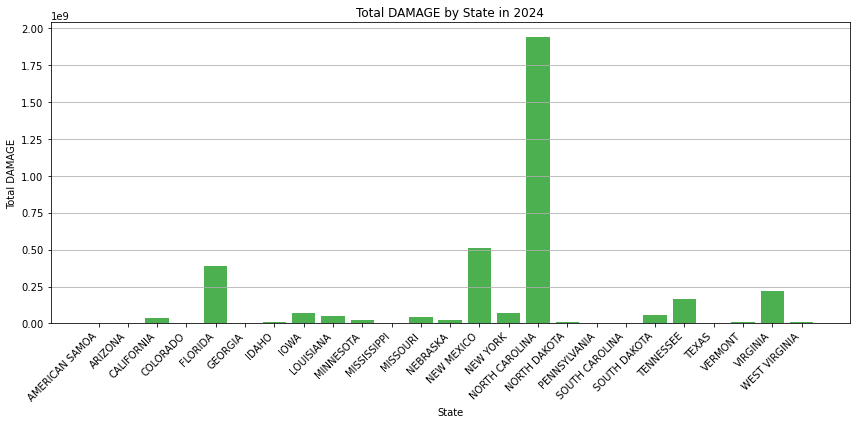

In [56]:
# Parameters (modify as needed)
selected_year = 2024  # Specify the year
selected_field = 'DAMAGE'  # Specify the field (e.g., 'DAMAGE', 'INJURIES', 'DEATHS')
df_name = 'df_flood_n_95'

plot_type = 'bar'  # Options: 'bar' (line plot not recommended for categorical x-axis)

# Filter for the selected year
df = globals()[df_name]
df_year = df[df['YEAR'] == selected_year]

# Group by STATE and sum the selected field
df_grouped = df_year.groupby('STATE')[selected_field].sum().reset_index()

# Extract data for plotting
states = df_grouped['STATE'].values  # 1D array of states
values = df_grouped[selected_field].values  # 1D array of values (int64)

# Create the plot
plt.figure(figsize=(12, 6))
if plot_type == 'bar':
    plt.bar(states, values, color='#4CAF50')
else:
    raise ValueError("Only 'bar' plot type is supported for categorical x-axis (STATE).")

plt.title(f'Total {selected_field} by State in {selected_year}')
plt.xlabel('State')
plt.ylabel(f'Total {selected_field}')
plt.grid(True, axis='y')
plt.xticks(rotation=45, ha='right')  # Rotate state names for readability
plt.tight_layout()

# Show the plot
plt.show()

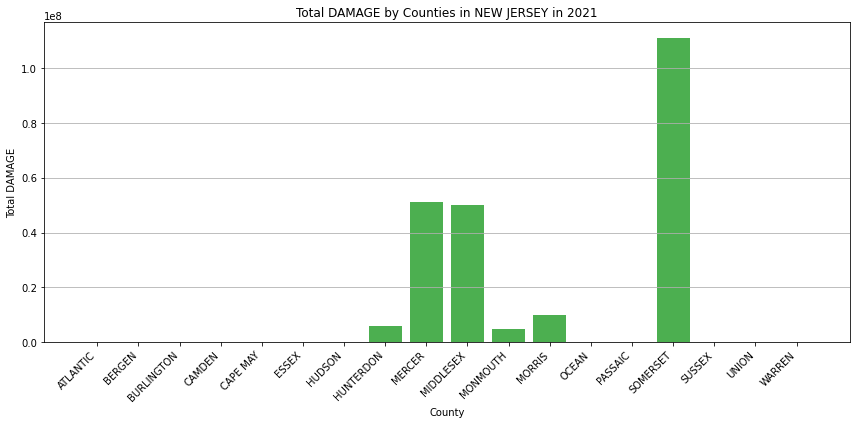

In [57]:
# Parameters (modify as needed)
selected_year = 2021  # Specify the year
selected_state = "NEW JERSEY"
selected_field = 'DAMAGE'  # Specify the field (e.g., 'DAMAGE', 'INJURIES', 'DEATHS')
df_name = 'df_flood_90'

plot_type = 'bar'  # Options: 'bar' (line plot not recommended for categorical x-axis)

# Filter for the selected year
df = globals()[df_name]
df_year_state = df[(df['YEAR'] == selected_year) & (df['STATE'] == selected_state)]

# Group by county and sum the selected field
df_grouped = df_year_state.groupby('CZ_NAME')[selected_field].sum().reset_index()

# Extract data for plotting
counties = df_grouped['CZ_NAME'].values  # 1D array of states
values = df_grouped[selected_field].values  # 1D array of values (int64)

# Create the plot
plt.figure(figsize=(12, 6))
if plot_type == 'bar':
    plt.bar(counties, values, color='#4CAF50')
else:
    raise ValueError("Only 'bar' plot type is supported for categorical x-axis (STATE).")

plt.title(f'Total {selected_field} by Counties in {selected_state} in {selected_year}')
plt.xlabel('County')
plt.ylabel(f'Total {selected_field}')
plt.grid(True, axis='y')
plt.xticks(rotation=45, ha='right')  # Rotate state names for readability
plt.tight_layout()

# Show the plot
plt.show()